# Graphene band structure

This example plots the band structure of graphene, a 2D material. 2D band
structures are not supported natively (yet), so we manually build a custom
path in reciprocal space.

n     Energy            log10(ΔE)   log10(Δρ)   Diag   Δtime
---   ---------------   ---------   ---------   ----   ------
  1   -11.15658405711                   -0.60    5.9         
  2   -11.16018940108       -2.44       -1.30    1.0    144ms
  3   -11.16039415038       -3.69       -2.34    2.1    143ms
  4   -11.16041686534       -4.64       -3.21    2.7    178ms
  5   -11.16041703644       -6.77       -3.34    3.0    169ms
  6   -11.16041704235       -8.23       -3.48    1.1    113ms
  7   -11.16041704742       -8.30       -3.76    1.3    131ms
  8   -11.16041705023       -8.55       -4.07    2.1    139ms
  9   -11.16041705130       -8.97       -4.64    2.1    145ms
 10   -11.16041705141       -9.94       -5.04    2.3    153ms
 11   -11.16041705144      -10.54       -5.36    2.9    157ms
 12   -11.16041705145      -11.11       -5.76    2.1    152ms
 13   -11.16041705145      -11.91       -6.41    2.7    160ms


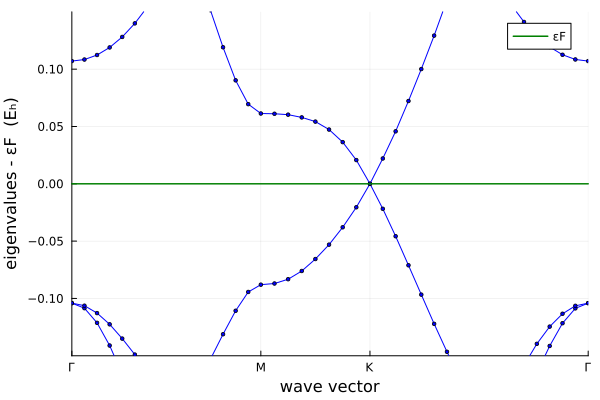

In [1]:
using DFTK
using Unitful
using UnitfulAtomic
using LinearAlgebra
using Plots

# Define the convergence parameters (these should be increased in production)
L = 20  # height of the simulation box
kgrid = [6, 6, 1]
Ecut = 15
temperature = 1e-3

# Define the geometry and pseudopotential
a = 4.66  # lattice constant
a1 = a*[1/2,-sqrt(3)/2, 0]
a2 = a*[1/2, sqrt(3)/2, 0]
a3 = L*[0  , 0        , 1]
lattice = [a1 a2 a3]
C1 = [1/3,-1/3,0.0]  # in reduced coordinates
C2 = -C1
positions = [C1, C2]
C = ElementPsp(:C; psp=load_psp("hgh/pbe/c-q4"))
atoms = [C, C]

# Run SCF
model = model_PBE(lattice, atoms, positions; temperature)
basis = PlaneWaveBasis(model; Ecut, kgrid)
scfres = self_consistent_field(basis)

# Construct 2D path through Brillouin zone
kpath = irrfbz_path(model; dim=2, space_group_number=13)  # graphene space group number
bands = compute_bands(scfres, kpath; kline_density=20)
plot_bandstructure(bands)